In [3]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
#                                                     test_size=0.20, random_state=11)

In [1]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 1.7 MB/s eta 0:00:00


In [4]:
import xgboost as xgb

print(xgb.__version__)

1.7.5


XGBoost의 scikit-learn 래퍼 클래스의 주요 하이퍼파라미터

- n_estimators: 부스트 트리의 개수를 결정합니다. 너무 큰 값은 오버피팅을 유발할 수 있습니다.
- learning_rate (eta): 각 트리의 가중치를 줄이는 역할을 합니다. 일반적으로 더 낮은 학습률은 더 많은 트리를 필요로 합니다.
- max_depth: 각 트리의 최대 깊이를 결정합니다. 이 값이 크면 모델은 복잡해지고 오버피팅 될 수 있습니다.
- min_child_weight: 트리에서 가지를 분할하기 위한 최소 가중치 합입니다. 이 값이 크면 모델은 보수적으로 학습합니다.
- subsample: 각 트리를 훈련시키기 위해 사용하는 데이터 샘플의 비율입니다. 이 값이 작으면 오버피팅을 피하는 데 도움이 될 수 있습니다.
- colsample_bytree: 각 트리를 훈련시키는 데 사용되는 열(특성)의 비율입니다.
- gamma: 리프 노드를 추가적으로 분할할 최소 손실 감소입니다. 이 값이 높을수록 모델은 보수적으로 학습합니다.
- reg_lambda (lambda): L2 정규화 가중치입니다.
- reg_alpha (alpha): L1 정규화 가중치입니다

#### 위스콘신 유방암 예측

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns= dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, \
                                                    test_size=0.20, random_state=11)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [25]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# 매개변수에 기본값을 설정하여서 매개변수를 필수로 입력하지 않아도 함수를 호출할 수 있도록 유연성 제공
# 기본값이 설정된 매개변수를 선택적으로 사용 가능
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬', '\n', confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [33]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬 
 [[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:0.9997


#### early_stopping_rounds
- XGBoost의 하이퍼파라미터는 아니지만, 학습 과정을 제어하는 중요한 매개변수 중 하나입니다. 이 매개변수는 validation set에 대한 모델의 성능이 개선되지 않을 경우 학습을 조기 종료하는 데 사용
- 설정한 라운드 수만큼 동안 검증 오차(validation error)가 감소하지 않을 경우에 학습이 조기에 중지됩니다. 이는 더 이상 학습이 진전되지 않거나 오버피팅이 시작되는 것을 방지하는 데 도움

#### eval_metric은 XGBoost 모델을 학습하면서 사용할 평가 지표를 지정하는 매개변수
- rmse: Root Mean Square Error
- mae: Mean Absolute Error
- logloss: Negative log-likelihood
- error: Binary classification error rate (0.5 threshold)
- auc: Area under the curve for both binary and multiclass classification
- mlogloss: Multiclass logloss
- merror: Multiclass classification error rate

In [35]:
xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1, max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss", eval_set=evals,verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61283
[1]	validation_0-logloss:0.54112
[2]	validation_0-logloss:0.48139
[3]	validation_0-logloss:0.42984
[4]	validation_0-logloss:0.38936
[5]	validation_0-logloss:0.35109
[6]	validation_0-logloss:0.32014
[7]	validation_0-logloss:0.29190
[8]	validation_0-logloss:0.26556
[9]	validation_0-logloss:0.24385
[10]	validation_0-logloss:0.22614
[11]	validation_0-logloss:0.21025
[12]	validation_0-logloss:0.19319
[13]	validation_0-logloss:0.17976
[14]	validation_0-logloss:0.16620
[15]	validation_0-logloss:0.15614
[16]	validation_0-logloss:0.14731
[17]	validation_0-logloss:0.13762
[18]	validation_0-logloss:0.12923
[19]	validation_0-logloss:0.12281
[20]	validation_0-logloss:0.11820
[21]	validation_0-logloss:0.11244
[22]	validation_0-logloss:0.10646
[23]	validation_0-logloss:0.10116
[24]	validation_0-logloss:0.09627
[25]	validation_0-logloss:0.09168
[26]	validation_0-logloss:0.08974
[27]	validation_0-logloss:0.08501
[28]	validation_0-logloss:0.08140
[29]	validation_0-loglos

[238]	validation_0-logloss:0.02726
[239]	validation_0-logloss:0.02724
[240]	validation_0-logloss:0.02728
[241]	validation_0-logloss:0.02726
[242]	validation_0-logloss:0.02739
[243]	validation_0-logloss:0.02756
[244]	validation_0-logloss:0.02752
[245]	validation_0-logloss:0.02745
[246]	validation_0-logloss:0.02755
[247]	validation_0-logloss:0.02749
[248]	validation_0-logloss:0.02750
[249]	validation_0-logloss:0.02748
[250]	validation_0-logloss:0.02747
[251]	validation_0-logloss:0.02739
[252]	validation_0-logloss:0.02752
[253]	validation_0-logloss:0.02761
[254]	validation_0-logloss:0.02755
[255]	validation_0-logloss:0.02751
[256]	validation_0-logloss:0.02750
[257]	validation_0-logloss:0.02765
[258]	validation_0-logloss:0.02763
[259]	validation_0-logloss:0.02772
[260]	validation_0-logloss:0.02766
[261]	validation_0-logloss:0.02778
[262]	validation_0-logloss:0.02773
[263]	validation_0-logloss:0.02769
[264]	validation_0-logloss:0.02762
[265]	validation_0-logloss:0.02762
[266]	validation_0-l

In [36]:
get_clf_eval(y_test,ws100_preds,ws100_pred_proba)

# early를 하면 더 개선될 수 있는데 막는거고 100preds사용하면 개선이 되죵~~

오차 행렬 
 [[36  2]
 [ 0 76]]
정확도: 0.9825, 정밀도: 0.9744, 재현율: 1.0000,    F1: 0.9870, AUC:1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

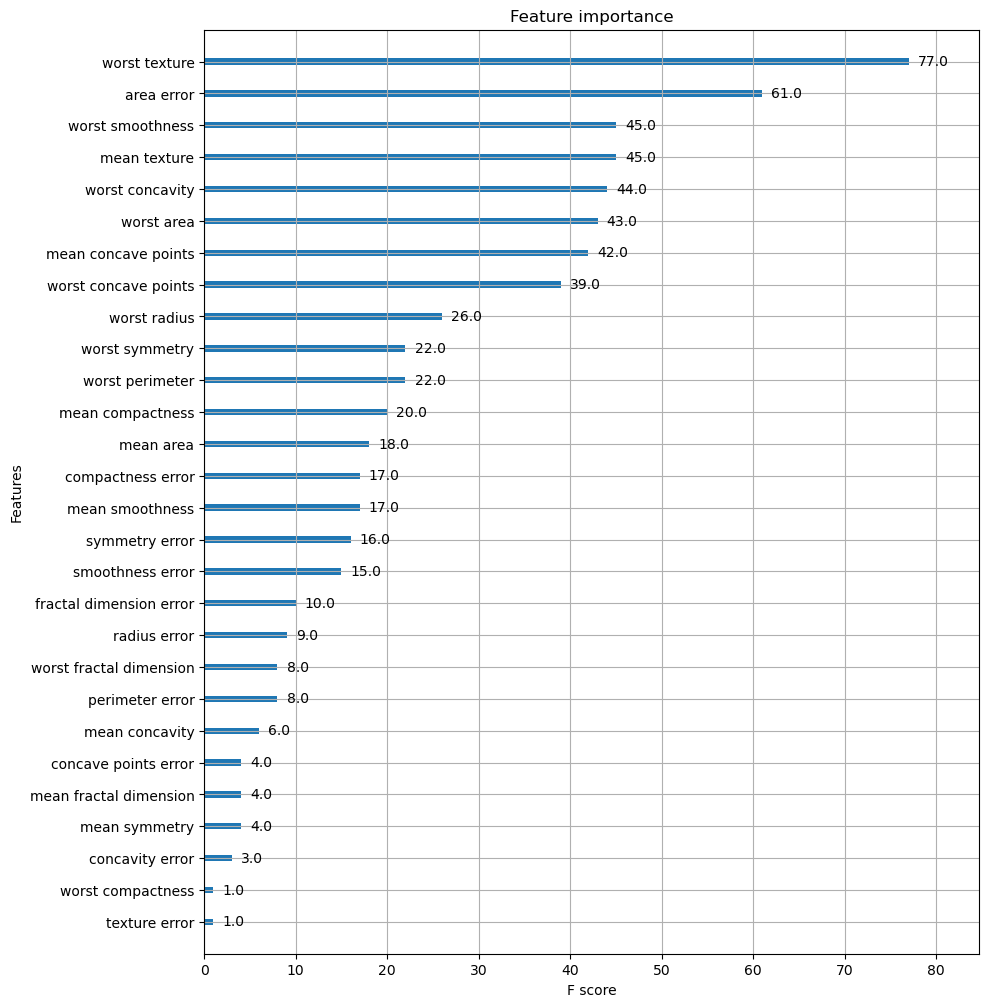

In [23]:
import matplotlib.pyplot as plt
flg, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

#예스리는 엄청엄청 기여엉 ㅎㅎ